In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

![1 kZDNDPLUlYW_3IloQ-fGpA.webp](<attachment:1 kZDNDPLUlYW_3IloQ-fGpA.webp>)
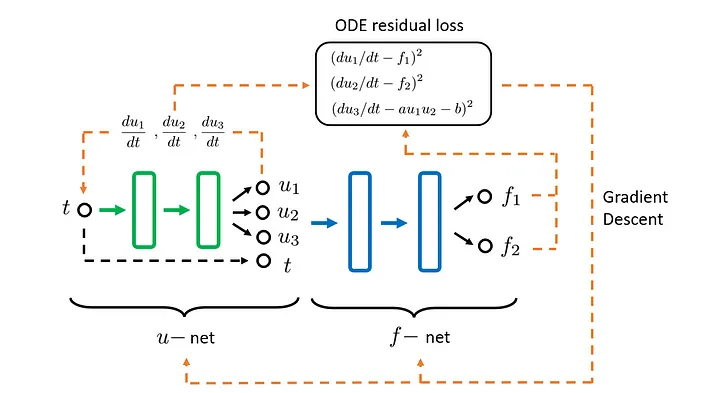

In [3]:
def u_net(u_input, output_dim):
    hidden = u_input
    hidden =keras.layers.Dense(50, activation='tanh')(hidden)
    hidden = keras.layers.Dense(50, activation='tanh')(hidden)
    output = keras.layers.Dense(output_dim)(hidden)
    return output    

def f_net(f_input, a_init=None, b_init=None):
    hidden = keras.layers.Concatenate()(f_input)
    hidden = keras.layers.Dense(50, activation='tanh')(hidden)
    hidden = keras.layers.Dense(50, activation='tanh')(hidden)
    output = keras.layers.Dense(2)(hidden)
    output = ParameterLayer(a_init, b_init)(output)
    return output

class ParameterLayer(tf.keras.layers.Layer):
    def __init__(self, a, b, trainable=True):
        super(ParameterLayer, self).__init__()
        self._a = tf.convert_to_tensor(a, dtype=tf.float32)
        self._b = tf.convert_to_tensor(b, dtype=tf.float32)
        self.trainable = trainable
  
    def build(self, input_shape):
        self.a = self.add_weight("a", shape=(1,), 
                                 initializer=tf.keras.initializers.Constant(value=self._a),
                                 trainable=self.trainable)
        self.b = self.add_weight("b", shape=(1,), 
                                 initializer=tf.keras.initializers.Constant(value=self._b),
                                 trainable=self.trainable)
        

    def get_config(self):
        return super().get_config()
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
def create_PINN(a_init=None, b_init=None, verbose=False):
    t_input = tf.keras.Input(shape=(1,), name="time")
    u = u_net(t_input, output_dim=3)
    f = f_net([t_input, u], a_init, b_init)
    model = tf.keras.models.Model(inputs=t_input, outputs=[u, f])
    if verbose:
        model.summary()
    return model